#  Reading and Exploring Data: 

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('rec.csv')

In [3]:
data.head(6)

,ID,DATE_DEMANDE,STATUT,CORPS
0,140,05/05/19 12:54:40,En cours de traitement,J'ai un problème pour mon carte
1,141,05/05/19 13:43:14,En cours de traitement,Bonjour. Je n'ai pas pu retirer de l'argent de...
2,142,05/05/19 13:50:22,En cours de traitement,¿¿¿¿¿¿ 11450¿¿¿¿¿ ¿¿¿ ¿¿¿ ¿¿¿¿ ¿¿¿ 20 ¿¿¿ ¿¿¿¿...
3,143,05/05/19 14:15:18,En cours de traitement,"Bonjour, j'arrive pas a effectuer un retrait. ..."
4,144,05/05/19 15:07:05,En cours de traitement,"J¿ai effectué un paiement de 69,500 Dt avec ma..."
5,145,05/05/19 15:17:10,En cours de traitement,Jai pas pu retirais de money du dab UIB \r\nMe...


In [4]:
import nltk

In [5]:
#nltk.download()

In [6]:
import pandas as pd
data=pd.read_csv('rec.csv')
pd.set_option('display.max_colwidth',150) #extend column width
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS
0,140,05/05/19 12:54:40,En cours de traitement,J'ai un problème pour mon carte
1,141,05/05/19 13:43:14,En cours de traitement,Bonjour. Je n'ai pas pu retirer de l'argent de mon compte KENZ et mon plafond de retrait est a zero malgres que je n'ai jamais retire de l'argent ...
2,142,05/05/19 13:50:22,En cours de traitement,¿¿¿¿¿¿ 11450¿¿¿¿¿ ¿¿¿ ¿¿¿ ¿¿¿¿ ¿¿¿ 20 ¿¿¿ ¿¿¿¿ ¿¿¿¿
3,143,05/05/19 14:15:18,En cours de traitement,"Bonjour, j'arrive pas a effectuer un retrait. \r\nMsg du distribuer : carte plafonnée \r\n \r\nRéclamation : je n'ai pas atteint mon plafond de re..."
4,144,05/05/19 15:07:05,En cours de traitement,"J¿ai effectué un paiement de 69,500 Dt avec ma carte sur TPE le 5 mai 2019 qui a été refusé 2 fois alors que mon plafond est de 5000 Dt."


 #  Preprocessing Data:

###   1-Convert sentence of column 'CORPS' to lowercase 

In [7]:
data['CORPS']=[dt.lower()for dt in data['CORPS']]
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS
0,140,05/05/19 12:54:40,En cours de traitement,j'ai un problème pour mon carte
1,141,05/05/19 13:43:14,En cours de traitement,bonjour. je n'ai pas pu retirer de l'argent de mon compte kenz et mon plafond de retrait est a zero malgres que je n'ai jamais retire de l'argent ...
2,142,05/05/19 13:50:22,En cours de traitement,¿¿¿¿¿¿ 11450¿¿¿¿¿ ¿¿¿ ¿¿¿ ¿¿¿¿ ¿¿¿ 20 ¿¿¿ ¿¿¿¿ ¿¿¿¿
3,143,05/05/19 14:15:18,En cours de traitement,"bonjour, j'arrive pas a effectuer un retrait. \r\nmsg du distribuer : carte plafonnée \r\n \r\nréclamation : je n'ai pas atteint mon plafond de re..."
4,144,05/05/19 15:07:05,En cours de traitement,"j¿ai effectué un paiement de 69,500 dt avec ma carte sur tpe le 5 mai 2019 qui a été refusé 2 fois alors que mon plafond est de 5000 dt."


###   2-Remove punctuation 

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punc(corps):
    corps_nopunc= "".join([c for c in corps if c not in string.punctuation and c != '¿'])
    return corps_nopunc

data['CORPS']=data['CORPS'].apply(lambda x: remove_punc(x))
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS
0,140,05/05/19 12:54:40,En cours de traitement,jai un problème pour mon carte
1,141,05/05/19 13:43:14,En cours de traitement,bonjour je nai pas pu retirer de largent de mon compte kenz et mon plafond de retrait est a zero malgres que je nai jamais retire de largent de ce...
2,142,05/05/19 13:50:22,En cours de traitement,11450 20
3,143,05/05/19 14:15:18,En cours de traitement,bonjour jarrive pas a effectuer un retrait \r\nmsg du distribuer carte plafonnée \r\n \r\nréclamation je nai pas atteint mon plafond de retrait ...
4,144,05/05/19 15:07:05,En cours de traitement,jai effectué un paiement de 69500 dt avec ma carte sur tpe le 5 mai 2019 qui a été refusé 2 fois alors que mon plafond est de 5000 dt


###   3-Remove New line and Carriage return 

In [10]:
def remove_nL(corps):
    corps_noNL= "".join ([c for c in corps if c != '\n' and c != '\r'])
    return corps_noNL

data['CORPS']=data['CORPS'].apply(lambda x: remove_nL(x))
data.head()


,ID,DATE_DEMANDE,STATUT,CORPS
0,140,05/05/19 12:54:40,En cours de traitement,jai un problème pour mon carte
1,141,05/05/19 13:43:14,En cours de traitement,bonjour je nai pas pu retirer de largent de mon compte kenz et mon plafond de retrait est a zero malgres que je nai jamais retire de largent de ce...
2,142,05/05/19 13:50:22,En cours de traitement,11450 20
3,143,05/05/19 14:15:18,En cours de traitement,bonjour jarrive pas a effectuer un retrait msg du distribuer carte plafonnée réclamation je nai pas atteint mon plafond de retrait merci de me...
4,144,05/05/19 15:07:05,En cours de traitement,jai effectué un paiement de 69500 dt avec ma carte sur tpe le 5 mai 2019 qui a été refusé 2 fois alors que mon plafond est de 5000 dt


###  4-Tokenize column 'COPRS' 

In [11]:
import re

def tokenize(corps):
    clean_corps= re.split('\W+',corps)
    return clean_corps

data['CORPS']=data['CORPS'].apply(lambda x: tokenize(x))
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS
0,140,05/05/19 12:54:40,En cours de traitement,"[jai, un, problème, pour, mon, carte]"
1,141,05/05/19 13:43:14,En cours de traitement,"[bonjour, je, nai, pas, pu, retirer, de, largent, de, mon, compte, kenz, et, mon, plafond, de, retrait, est, a, zero, malgres, que, je, nai, jamai..."
2,142,05/05/19 13:50:22,En cours de traitement,"[, 11450, 20, ]"
3,143,05/05/19 14:15:18,En cours de traitement,"[bonjour, jarrive, pas, a, effectuer, un, retrait, msg, du, distribuer, carte, plafonnée, réclamation, je, nai, pas, atteint, mon, plafond, de, re..."
4,144,05/05/19 15:07:05,En cours de traitement,"[jai, effectué, un, paiement, de, 69500, dt, avec, ma, carte, sur, tpe, le, 5, mai, 2019, qui, a, été, refusé, 2, fois, alors, que, mon, plafond, ..."


###   5-Remove Stopwords 

In [12]:
from nltk.corpus import stopwords
stop_words = stopwords.words('french')
print(stop_words)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [13]:
def remove_stopwords(corps):
    filtered_words = [mot for mot in corps if mot not in stop_words]
    return filtered_words

data['CORPS']=data['CORPS'].apply(lambda x: remove_stopwords(x))
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS
0,140,05/05/19 12:54:40,En cours de traitement,"[jai, problème, carte]"
1,141,05/05/19 13:43:14,En cours de traitement,"[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf..."
2,142,05/05/19 13:50:22,En cours de traitement,"[, 11450, 20, ]"
3,143,05/05/19 14:15:18,En cours de traitement,"[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]"
4,144,05/05/19 15:07:05,En cours de traitement,"[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]"


###   6-Stemming data 

In [14]:
porter = nltk.PorterStemmer()

def stemming(corps):
    corps_stemmed = [porter.stem(mot) for mot in corps]
    return corps_stemmed

data['CORPS_stemma']=data['CORPS'].apply(lambda x: stemming(x))
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS,CORPS_stemma
0,140,05/05/19 12:54:40,En cours de traitement,"[jai, problème, carte]","[jai, problèm, cart]"
1,141,05/05/19 13:43:14,En cours de traitement,"[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf...","[bonjour, nai, pu, retir, largent, compt, kenz, plafond, retrait, a, zero, malgr, nai, jamai, retir, largent, compt, merci, corrig, plafond, retra..."
2,142,05/05/19 13:50:22,En cours de traitement,"[, 11450, 20, ]","[, 11450, 20, ]"
3,143,05/05/19 14:15:18,En cours de traitement,"[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]","[bonjour, jarriv, a, effectu, retrait, msg, distribu, cart, plafonné, réclamat, nai, atteint, plafond, retrait, merci, contact, asap]"
4,144,05/05/19 15:07:05,En cours de traitement,"[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, cart, tpe, 5, mai, 2019, a, refusé, 2, foi, alor, plafond, 5000, dt]"


###  7-lemmatizing data 

In [15]:
wnl=nltk.WordNetLemmatizer()

def lemmatizing(corps):
    corps_lemmatized = [wnl.lemmatize(mot) for mot in corps]
    return corps_lemmatized

data['CORPS_lemma']=data['CORPS'].apply(lambda x: lemmatizing(x))
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS,CORPS_stemma,CORPS_lemma
0,140,05/05/19 12:54:40,En cours de traitement,"[jai, problème, carte]","[jai, problèm, cart]","[jai, problème, carte]"
1,141,05/05/19 13:43:14,En cours de traitement,"[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf...","[bonjour, nai, pu, retir, largent, compt, kenz, plafond, retrait, a, zero, malgr, nai, jamai, retir, largent, compt, merci, corrig, plafond, retra...","[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf..."
2,142,05/05/19 13:50:22,En cours de traitement,"[, 11450, 20, ]","[, 11450, 20, ]","[, 11450, 20, ]"
3,143,05/05/19 14:15:18,En cours de traitement,"[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]","[bonjour, jarriv, a, effectu, retrait, msg, distribu, cart, plafonné, réclamat, nai, atteint, plafond, retrait, merci, contact, asap]","[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]"
4,144,05/05/19 15:07:05,En cours de traitement,"[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, cart, tpe, 5, mai, 2019, a, refusé, 2, foi, alor, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]"


In [16]:
data

,ID,DATE_DEMANDE,STATUT,CORPS,CORPS_stemma,CORPS_lemma
0,140,05/05/19 12:54:40,En cours de traitement,"[jai, problème, carte]","[jai, problèm, cart]","[jai, problème, carte]"
1,141,05/05/19 13:43:14,En cours de traitement,"[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf...","[bonjour, nai, pu, retir, largent, compt, kenz, plafond, retrait, a, zero, malgr, nai, jamai, retir, largent, compt, merci, corrig, plafond, retra...","[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf..."
2,142,05/05/19 13:50:22,En cours de traitement,"[, 11450, 20, ]","[, 11450, 20, ]","[, 11450, 20, ]"
3,143,05/05/19 14:15:18,En cours de traitement,"[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]","[bonjour, jarriv, a, effectu, retrait, msg, distribu, cart, plafonné, réclamat, nai, atteint, plafond, retrait, merci, contact, asap]","[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]"
4,144,05/05/19 15:07:05,En cours de traitement,"[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, cart, tpe, 5, mai, 2019, a, refusé, 2, foi, alor, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]"
...,...,...,...,...,...,...
104,146,05/05/19 15:30:55,En cours de traitement,"[jarrive, retrait, aucune, montant]","[jarriv, retrait, aucun, montant]","[jarrive, retrait, aucune, montant]"
105,19,03/05/19 07:07:57,En cours de traitement,"[bonjour, essayant, faire, virement, permanent, lapplication, a, affiché, message, intitulé, erreur, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhi...","[bonjour, essay, fair, virement, perman, lapplic, a, affiché, messag, intitulé, erreur, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtu0in0cp6...","[bonjour, essayant, faire, virement, permanent, lapplication, a, affiché, message, intitulé, erreur, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhi..."
106,90,03/05/19 17:34:15,En cours de traitement,"[tetulaire, compte, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtcwmtazndc2myj9o1r9ua1dxatikax95jlen02vsra2iqe1dehsdvbvk, eyj0exaioijkv1qilcj...","[tetulair, compt, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtcwmtazndc2myj9o1r9ua1dxatikax95jlen02vsra2iqe1dehsdvbvk, eyj0exaioijkv1qilcjhb...","[tetulaire, compte, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtcwmtazndc2myj9o1r9ua1dxatikax95jlen02vsra2iqe1dehsdvbvk, eyj0exaioijkv1qilcj..."
107,134,05/05/19 10:42:42,En cours de traitement,"[bonjour, jai, dhabitude, possibilité, retirer, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtawmcj9ch3nduauv6fnfigeeoowvhoflxeayxfzev7itr5ew,...","[bonjour, jai, dhabitud, possibilité, retir, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtawmcj9ch3nduauv6fnfigeeoowvhoflxeayxfzev7itr5ew, dt...","[bonjour, jai, dhabitude, possibilité, retirer, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtawmcj9ch3nduauv6fnfigeeoowvhoflxeayxfzev7itr5ew,..."


###  8-Remove inexistent words 

In [17]:
def remove_fakeword(corps):
    clean_corps=[mot for mot in corps if len(mot)<=32]
    return clean_corps


data['clean_corps']=data['CORPS'].apply(lambda x: remove_fakeword(x))
data.head()
    

,ID,DATE_DEMANDE,STATUT,CORPS,CORPS_stemma,CORPS_lemma,clean_corps
0,140,05/05/19 12:54:40,En cours de traitement,"[jai, problème, carte]","[jai, problèm, cart]","[jai, problème, carte]","[jai, problème, carte]"
1,141,05/05/19 13:43:14,En cours de traitement,"[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf...","[bonjour, nai, pu, retir, largent, compt, kenz, plafond, retrait, a, zero, malgr, nai, jamai, retir, largent, compt, merci, corrig, plafond, retra...","[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf...","[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf..."
2,142,05/05/19 13:50:22,En cours de traitement,"[, 11450, 20, ]","[, 11450, 20, ]","[, 11450, 20, ]","[, 11450, 20, ]"
3,143,05/05/19 14:15:18,En cours de traitement,"[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]","[bonjour, jarriv, a, effectu, retrait, msg, distribu, cart, plafonné, réclamat, nai, atteint, plafond, retrait, merci, contact, asap]","[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]","[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]"
4,144,05/05/19 15:07:05,En cours de traitement,"[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, cart, tpe, 5, mai, 2019, a, refusé, 2, foi, alor, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]"


In [18]:
data

,ID,DATE_DEMANDE,STATUT,CORPS,CORPS_stemma,CORPS_lemma,clean_corps
0,140,05/05/19 12:54:40,En cours de traitement,"[jai, problème, carte]","[jai, problèm, cart]","[jai, problème, carte]","[jai, problème, carte]"
1,141,05/05/19 13:43:14,En cours de traitement,"[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf...","[bonjour, nai, pu, retir, largent, compt, kenz, plafond, retrait, a, zero, malgr, nai, jamai, retir, largent, compt, merci, corrig, plafond, retra...","[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf...","[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf..."
2,142,05/05/19 13:50:22,En cours de traitement,"[, 11450, 20, ]","[, 11450, 20, ]","[, 11450, 20, ]","[, 11450, 20, ]"
3,143,05/05/19 14:15:18,En cours de traitement,"[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]","[bonjour, jarriv, a, effectu, retrait, msg, distribu, cart, plafonné, réclamat, nai, atteint, plafond, retrait, merci, contact, asap]","[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]","[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]"
4,144,05/05/19 15:07:05,En cours de traitement,"[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, cart, tpe, 5, mai, 2019, a, refusé, 2, foi, alor, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]","[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]"
...,...,...,...,...,...,...,...
104,146,05/05/19 15:30:55,En cours de traitement,"[jarrive, retrait, aucune, montant]","[jarriv, retrait, aucun, montant]","[jarrive, retrait, aucune, montant]","[jarrive, retrait, aucune, montant]"
105,19,03/05/19 07:07:57,En cours de traitement,"[bonjour, essayant, faire, virement, permanent, lapplication, a, affiché, message, intitulé, erreur, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhi...","[bonjour, essay, fair, virement, perman, lapplic, a, affiché, messag, intitulé, erreur, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtu0in0cp6...","[bonjour, essayant, faire, virement, permanent, lapplication, a, affiché, message, intitulé, erreur, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhi...","[bonjour, essayant, faire, virement, permanent, lapplication, a, affiché, message, intitulé, erreur, client, dispose, déjà, dun, terminal, transac..."
106,90,03/05/19 17:34:15,En cours de traitement,"[tetulaire, compte, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtcwmtazndc2myj9o1r9ua1dxatikax95jlen02vsra2iqe1dehsdvbvk, eyj0exaioijkv1qilcj...","[tetulair, compt, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtcwmtazndc2myj9o1r9ua1dxatikax95jlen02vsra2iqe1dehsdvbvk, eyj0exaioijkv1qilcjhb...","[tetulaire, compte, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtcwmtazndc2myj9o1r9ua1dxatikax95jlen02vsra2iqe1dehsdvbvk, eyj0exaioijkv1qilcj...","[tetulaire, compte, a, agence, tabarka, refuse, donner, in, carnet, cheque, refuse, mexpliquer]"
107,134,05/05/19 10:42:42,En cours de traitement,"[bonjour, jai, dhabitude, possibilité, retirer, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtawmcj9ch3nduauv6fnfigeeoowvhoflxeayxfzev7itr5ew,...","[bonjour, jai, dhabitud, possibilité, retir, eyj0exaioijkv1qilcjhbgcioijiuzi1nij9eyjkyxrhijoimtawmcj9ch3nduauv6fnfigeeoowvhoflxeayxfzev7itr5ew, dt...","[bonjour, jai, dhabitude, possibilité, retirer, eyj0exai

### Function to:  remove punctuation ,remove stopwords,remove \n \r ,tokenize  and stemming data 


In [19]:
import re
import string
from nltk.corpus import stopwords

stop_words = stopwords.words('french')
wnl=nltk.WordNetLemmatizer()

def clean_data(corps):
    corps = "".join([word.lower()for word in corps if word not in string.punctuation and word!='¿'])
    corps = corps.strip()
    corps = re.sub('\n','\r' '', corps)
    corps = re.split('\W+', corps)
    corps = [wnl.lemmatize(word) for word in corps if word not in stop_words]
    corps=[word for word in corps if len(word)<=32]
    return corps

#  Vectorizing Data: 

 ###  1-Bag-Of-Words 

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

#error: 'list'object has no attribute 'lower'
#clean_corps is a column of list not a text.
data['clean_corps']=[" ".join(clean_corps) for clean_corps in data['clean_corps'].values]

cv=CountVectorizer()

n=cv.fit(data['clean_corps'])
print(n.vocabulary_)
print('-'*100)
print(cv.get_feature_names())
print('-'*100)

n=cv.transform(data['clean_corps'])
print('shape: ',n.shape)

print('-'*100)
print(n)

print('-'*100)
print(n.toarray()) #matrix form

print('-'*100,'\n',"Data Frame:")
dt=pd.DataFrame(n.toarray(),columns=cv.get_feature_names())
dt

{'jai': 338, 'problème': 494, 'carte': 138, 'bonjour': 127, 'nai': 425, 'pu': 504, 'retirer': 546, 'largent': 358, 'compte': 179, 'kenz': 349, 'plafond': 472, 'retrait': 548, 'zero': 686, 'malgres': 383, 'jamais': 340, 'retire': 545, 'merci': 400, 'corriger': 197, 'adel': 61, '11450': 10, '20': 19, 'jarrive': 341, 'effectuer': 272, 'msg': 421, 'distribuer': 245, 'plafonnée': 473, 'réclamation': 560, 'atteint': 92, 'contacter': 189, 'asap': 90, 'effectué': 273, 'paiement': 451, '69500': 43, 'dt': 253, 'tpe': 640, 'mai': 380, '2019': 24, 'refusé': 526, 'fois': 310, 'alors': 72, '5000': 40, 'retirais': 544, 'money': 414, 'dab': 207, 'uib': 654, 'message': 402, 'dépassé': 265, 'limite': 366, 'rencontré': 536, 'lors': 373, 'deffectuer': 216, 'virement': 668, 'via': 665, 'cette': 147, 'application': 83, 'erreur': 286, 'mapparaît': 388, 'indique': 328, 'client': 167, 'dispose': 243, 'déjà': 262, 'terminal': 629, 'transactionnel': 643, 'compris': 177, 'pourquoi': 483, 'maffiche': 378, 'renseig

,01,02052019,035,10,100,1000,100d,100tnd100tnd,103,11,...,zahra,zero,zitouna,ça,écrire,électron,épargne,épouse,équipe,étapes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data sample : 

In [21]:
data_s=data[5:50]
cv1=CountVectorizer()
x=cv1.fit_transform(data_s['clean_corps'])
print('shape: ',x.shape)

print('-'*100,'\n',"Data Frame 2:")
df=pd.DataFrame(x.toarray(),columns=cv1.get_feature_names())
df.head(20)

shape:  (45, 353)
---------------------------------------------------------------------------------------------------- 
 Data Frame 2:


,01,10,100,1000,11,1221128,1228268,130,2019,26500,...,ya,zahra,zitouna,ça,écrire,électron,épargne,épouse,équipe,étapes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,1,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0


###  2- N-Grams  

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(ngram_range=(3,3))

x=cv.fit_transform(data_s['clean_corps'])
print('shape: ',x.shape)

print('-'*100,'\n',"Data Frame:")
dt=pd.DataFrame(x.toarray(),columns=cv.get_feature_names())
dt

shape:  (45, 551)
---------------------------------------------------------------------------------------------------- 
 Data Frame:


,01 mai 2019,10 avril 2019,100 dt min,11 dt chaque,1221128 trouve solde,1228268 sans trouver,130 lajout dun,2019 ena flous,2019 sujet opération,26500 ça acceptée,...,zitouna zahra 01,ça acceptée attente,ça fait voici,ça marche actuellement,écrire jai essayé,électron dailleurs paye,épargne erreur terminal,épouse lapplication mobile,équipe support jai,étapes crois jai
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


###  3- TF-IDF  

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv=TfidfVectorizer()

n=tfv.fit_transform(data['clean_corps'])
print('shape: ',n.shape)

print('-'*100)
print(n)

print('-'*100,'\n',"Data Frame:")
dt=pd.DataFrame(n.toarray(),columns=tfv.get_feature_names())
dt

shape:  (109, 695)
----------------------------------------------------------------------------------------------------
  (0, 138)	0.5545321069811986
  (0, 494)	0.661858297637434
  (0, 338)	0.5044182155468518
  (1, 61)	0.22550795387679695
  (1, 197)	0.22550795387679695
  (1, 400)	0.10354945076635211
  (1, 545)	0.22550795387679695
  (1, 340)	0.20724761378847079
  (1, 383)	0.22550795387679695
  (1, 686)	0.22550795387679695
  (1, 548)	0.2974674060122573
  (1, 472)	0.3520627124471192
  (1, 349)	0.22550795387679695
  (1, 179)	0.22719768218747438
  (1, 358)	0.41449522757694157
  (1, 546)	0.20724761378847079
  (1, 504)	0.16908909711863676
  (1, 425)	0.3520627124471192
  (1, 127)	0.09925710535289127
  (2, 19)	0.6766679304236248
  (2, 10)	0.7362883347821072
  (3, 90)	0.29552503968616417
  (3, 189)	0.29552503968616417
  (3, 92)	0.29552503968616417
  (3, 560)	0.2067567241116664
  :	:
  (107, 548)	0.15503060715960876
  (107, 472)	0.18348395476540585
  (107, 546)	0.21602180775854687
  (107, 127)	0.

,01,02052019,035,10,100,1000,100d,100tnd100tnd,103,11,...,zahra,zero,zitouna,ça,écrire,électron,épargne,épouse,équipe,étapes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.225508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#  Feature Engineering:

In [24]:
import pandas as pd
data=pd.read_csv('rec.csv')
pd.set_option('display.max_colwidth',150)
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS
0,140,05/05/19 12:54:40,En cours de traitement,J'ai un problème pour mon carte
1,141,05/05/19 13:43:14,En cours de traitement,Bonjour. Je n'ai pas pu retirer de l'argent de mon compte KENZ et mon plafond de retrait est a zero malgres que je n'ai jamais retire de l'argent ...
2,142,05/05/19 13:50:22,En cours de traitement,¿¿¿¿¿¿ 11450¿¿¿¿¿ ¿¿¿ ¿¿¿ ¿¿¿¿ ¿¿¿ 20 ¿¿¿ ¿¿¿¿ ¿¿¿¿
3,143,05/05/19 14:15:18,En cours de traitement,"Bonjour, j'arrive pas a effectuer un retrait. \r\nMsg du distribuer : carte plafonnée \r\n \r\nRéclamation : je n'ai pas atteint mon plafond de re..."
4,144,05/05/19 15:07:05,En cours de traitement,"J¿ai effectué un paiement de 69,500 Dt avec ma carte sur TPE le 5 mai 2019 qui a été refusé 2 fois alors que mon plafond est de 5000 Dt."


###  1-Corps Length before cleaning 

In [25]:
data['CORPS_length1']=data['CORPS'].apply( lambda x:len(x)-x.count(' '))

data.head()

,ID,DATE_DEMANDE,STATUT,CORPS,CORPS_length1
0,140,05/05/19 12:54:40,En cours de traitement,J'ai un problème pour mon carte,26
1,141,05/05/19 13:43:14,En cours de traitement,Bonjour. Je n'ai pas pu retirer de l'argent de mon compte KENZ et mon plafond de retrait est a zero malgres que je n'ai jamais retire de l'argent ...,168
2,142,05/05/19 13:50:22,En cours de traitement,¿¿¿¿¿¿ 11450¿¿¿¿¿ ¿¿¿ ¿¿¿ ¿¿¿¿ ¿¿¿ 20 ¿¿¿ ¿¿¿¿ ¿¿¿¿,42
3,143,05/05/19 14:15:18,En cours de traitement,"Bonjour, j'arrive pas a effectuer un retrait. \r\nMsg du distribuer : carte plafonnée \r\n \r\nRéclamation : je n'ai pas atteint mon plafond de re...",149
4,144,05/05/19 15:07:05,En cours de traitement,"J¿ai effectué un paiement de 69,500 Dt avec ma carte sur TPE le 5 mai 2019 qui a été refusé 2 fois alors que mon plafond est de 5000 Dt.",107


###  2- % of Punctuation 

In [26]:
import string

def count_punctuation(corps):
    count=sum([1 for c in corps if c in string.punctuation ])
    return round((count*100)/(len(corps)-corps.count(' ')),2)

data['punctuation_%']=data['CORPS'].apply( lambda x:count_punctuation(x))
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS,CORPS_length1,punctuation_%
0,140,05/05/19 12:54:40,En cours de traitement,J'ai un problème pour mon carte,26,3.85
1,141,05/05/19 13:43:14,En cours de traitement,Bonjour. Je n'ai pas pu retirer de l'argent de mon compte KENZ et mon plafond de retrait est a zero malgres que je n'ai jamais retire de l'argent ...,168,4.17
2,142,05/05/19 13:50:22,En cours de traitement,¿¿¿¿¿¿ 11450¿¿¿¿¿ ¿¿¿ ¿¿¿ ¿¿¿¿ ¿¿¿ 20 ¿¿¿ ¿¿¿¿ ¿¿¿¿,42,0.00
3,143,05/05/19 14:15:18,En cours de traitement,"Bonjour, j'arrive pas a effectuer un retrait. \r\nMsg du distribuer : carte plafonnée \r\n \r\nRéclamation : je n'ai pas atteint mon plafond de re...",149,4.70
4,144,05/05/19 15:07:05,En cours de traitement,"J¿ai effectué un paiement de 69,500 Dt avec ma carte sur TPE le 5 mai 2019 qui a été refusé 2 fois alors que mon plafond est de 5000 Dt.",107,1.87


### 3-Corps Length after cleaning 

In [27]:
def funct_join(corps):
    corps=" ".join(corps)
    return corps

In [28]:
data['clean_data']=data['CORPS'].apply(lambda x:clean_data(x))
str_clean_data=data['clean_data'].apply(lambda x:funct_join(x))
data['CORPS_length2']=str_clean_data.apply( lambda x:len(x)-x.count(' '))
data.head()
#data['CORPS_length1'].max()

,ID,DATE_DEMANDE,STATUT,CORPS,CORPS_length1,punctuation_%,clean_data,CORPS_length2
0,140,05/05/19 12:54:40,En cours de traitement,J'ai un problème pour mon carte,26,3.85,"[jai, problème, carte]",16
1,141,05/05/19 13:43:14,En cours de traitement,Bonjour. Je n'ai pas pu retirer de l'argent de mon compte KENZ et mon plafond de retrait est a zero malgres que je n'ai jamais retire de l'argent ...,168,4.17,"[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf...",121
2,142,05/05/19 13:50:22,En cours de traitement,¿¿¿¿¿¿ 11450¿¿¿¿¿ ¿¿¿ ¿¿¿ ¿¿¿¿ ¿¿¿ 20 ¿¿¿ ¿¿¿¿ ¿¿¿¿,42,0.00,"[11450, 20]",7
3,143,05/05/19 14:15:18,En cours de traitement,"Bonjour, j'arrive pas a effectuer un retrait. \r\nMsg du distribuer : carte plafonnée \r\n \r\nRéclamation : je n'ai pas atteint mon plafond de re...",149,4.70,"[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]",111
4,144,05/05/19 15:07:05,En cours de traitement,"J¿ai effectué un paiement de 69,500 Dt avec ma carte sur TPE le 5 mai 2019 qui a été refusé 2 fois alors que mon plafond est de 5000 Dt.",107,1.87,"[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]",72


### 4-Line chart with multiple lines

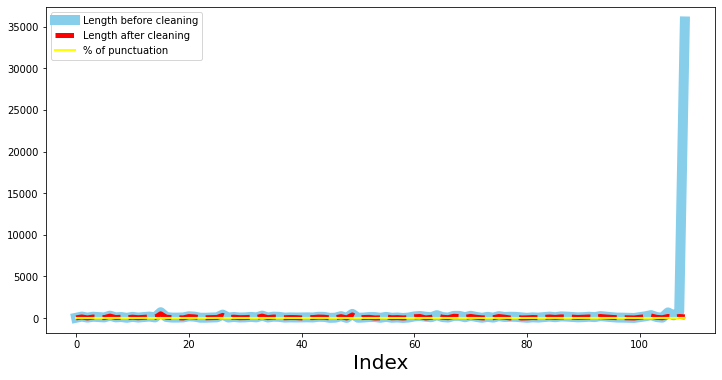

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

x = data.index.values

y1 =data['CORPS_length1'].tolist()
y2 =data['CORPS_length2'].tolist()
y3 =data['punctuation_%'].tolist()

plt.subplots(figsize = (12,6))
#line1
plt.plot(x,y1,color='skyblue', linewidth=10,label="Length before cleaning") 
#line2
plt.plot(x,y2,color='red',linewidth=5,linestyle='dashed',label="Length after cleaning") 
#line3
plt.plot(x,y3,color='yellow',linewidth=2,label="% of punctuation") 
plt.legend()

plt.xlabel('Index',fontsize=20)
plt.show()

### 5-Calculate words' frequency of 'clean_data' column

In [30]:
from collections import Counter
 
string_data=data['clean_data'].apply(lambda x:funct_join(x))
words=string_data.tolist()

print("The original list is : " + str(words))
   
    # empty list
lst = []
for i in words:
       
    # Getting all words
    for j in i.split():
        lst.append(j)
    
# Calculate frequency of all words
    freq = Counter(lst)
# Put frequency of all words into DataFrame   
    count_word_dic=dict({})
    for i in freq:
        count_word_dic[i]=freq[i]

The original list is : ['jai problème carte', 'bonjour nai pu retirer largent compte kenz plafond retrait a zero malgres nai jamais retire largent compte merci corriger plafond retrait adel', '11450 20', 'bonjour jarrive a effectuer retrait msg distribuer carte plafonnée réclamation nai atteint plafond retrait merci contacter asap', 'jai effectué paiement 69500 dt carte tpe 5 mai 2019 a refusé 2 fois alors plafond 5000 dt', 'jai pu retirais money dab uib message dépassé limite', 'bonjour jai rencontré problème lors deffectuer virement via cette application erreur mapparaît indique client dispose déjà terminal transactionnel jai compris pourquoi maffiche cette erreur merci renseigner type problème merci davance bien cordialement firas', 'bonsoir jarrive faire operation viremenet via uib mobile cdt', 'bonjour estce possible lancer demande carte oxygène ligne jai perdu carte merci davance réponse', 'changement terminal', 'bonjour peux désabonner service messagek ca pourrai desactiver pour

### 6-Convert the dictionary to DataFrame

In [31]:
words_df=pd.DataFrame(list(count_word_dic.items()),columns=['Word', 'Count'])
words_df

,Word,Count
0,jai,43
1,problème,16
2,carte,32
3,bonjour,32
4,nai,7
...,...,...
692,survenvenue,1
693,deja,1
694,comptes,1
695,cle,1


### 7-Find the most frequent words 

In [32]:
most_frequent_words=words_df.nlargest(46, ['Count']) 
most_frequent_words

,Word,Count
0,jai,43
8,compte,35
2,carte,32
3,bonjour,32
17,merci,30
54,virement,21
12,a,18
1,problème,16
76,faire,15
113,lapplication,15


### 8-Lollipop plot of frequent words

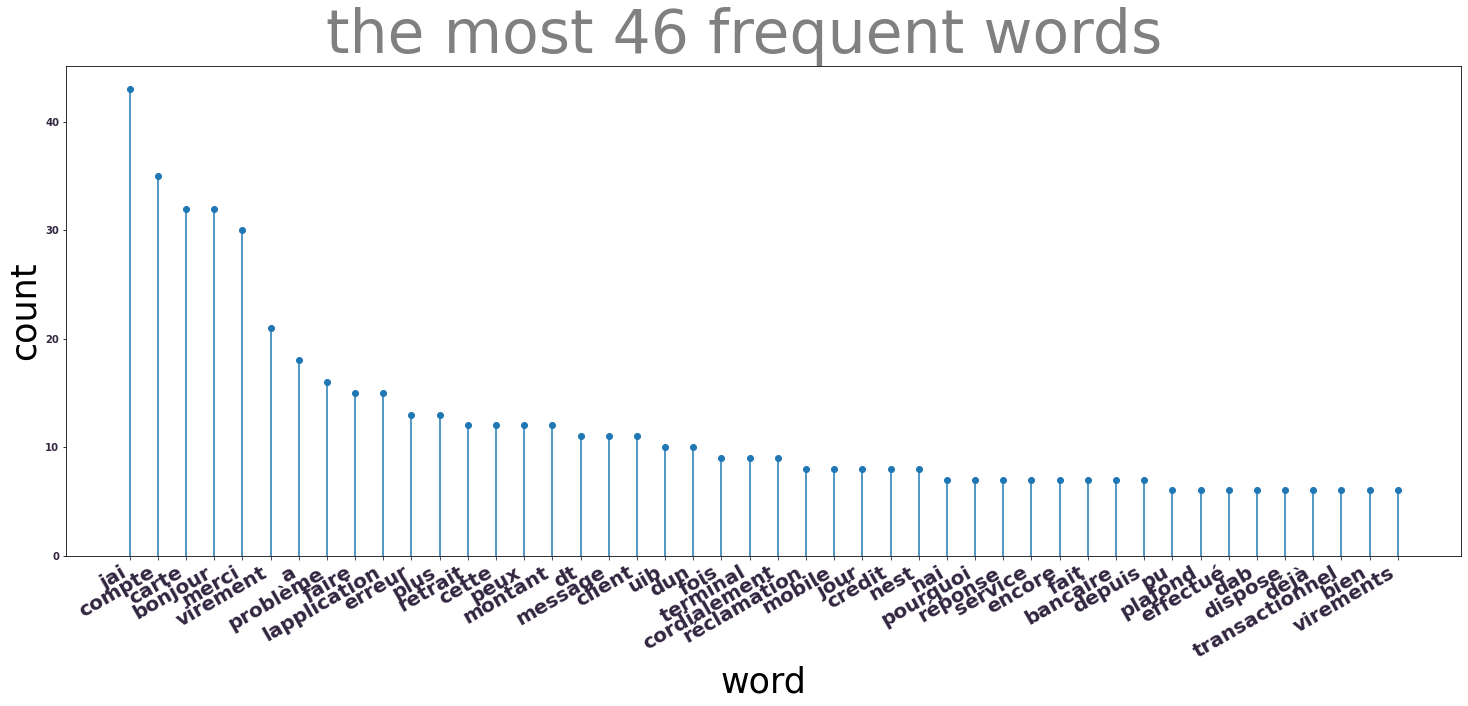

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(most_frequent_words, columns = ['Word', 'Count'])

fig, axes = plt.subplots(figsize = (25,10))
  
axes.stem(df['Word'], df['Count'],use_line_collection=True, basefmt=' ')
  
axes.set_ylim(0)
  
ax = plt.gca()
ax.tick_params(axis='x', colors='#322640',labelsize=20)
plt.xticks(color='#322640',fontweight='bold')
plt.yticks(color='#322640',fontweight='bold')
fig.autofmt_xdate()
plt.title("the most 46 frequent words  ",fontsize=60,color='grey')
plt.ylabel('count',fontsize=35)
plt.xlabel('word',fontsize=35)
plt.show()

### 9-Scatter plot of Complaints hour

In [34]:
data['Hour']=data['DATE_DEMANDE'].str[9:11]
data['date']=data['DATE_DEMANDE'].str[:8]
data.head()

,ID,DATE_DEMANDE,STATUT,CORPS,CORPS_length1,punctuation_%,clean_data,CORPS_length2,Hour,date
0,140,05/05/19 12:54:40,En cours de traitement,J'ai un problème pour mon carte,26,3.85,"[jai, problème, carte]",16,12,05/05/19
1,141,05/05/19 13:43:14,En cours de traitement,Bonjour. Je n'ai pas pu retirer de l'argent de mon compte KENZ et mon plafond de retrait est a zero malgres que je n'ai jamais retire de l'argent ...,168,4.17,"[bonjour, nai, pu, retirer, largent, compte, kenz, plafond, retrait, a, zero, malgres, nai, jamais, retire, largent, compte, merci, corriger, plaf...",121,13,05/05/19
2,142,05/05/19 13:50:22,En cours de traitement,¿¿¿¿¿¿ 11450¿¿¿¿¿ ¿¿¿ ¿¿¿ ¿¿¿¿ ¿¿¿ 20 ¿¿¿ ¿¿¿¿ ¿¿¿¿,42,0.00,"[11450, 20]",7,13,05/05/19
3,143,05/05/19 14:15:18,En cours de traitement,"Bonjour, j'arrive pas a effectuer un retrait. \r\nMsg du distribuer : carte plafonnée \r\n \r\nRéclamation : je n'ai pas atteint mon plafond de re...",149,4.70,"[bonjour, jarrive, a, effectuer, retrait, msg, distribuer, carte, plafonnée, réclamation, nai, atteint, plafond, retrait, merci, contacter, asap]",111,14,05/05/19
4,144,05/05/19 15:07:05,En cours de traitement,"J¿ai effectué un paiement de 69,500 Dt avec ma carte sur TPE le 5 mai 2019 qui a été refusé 2 fois alors que mon plafond est de 5000 Dt.",107,1.87,"[jai, effectué, paiement, 69500, dt, carte, tpe, 5, mai, 2019, a, refusé, 2, fois, alors, plafond, 5000, dt]",72,15,05/05/19


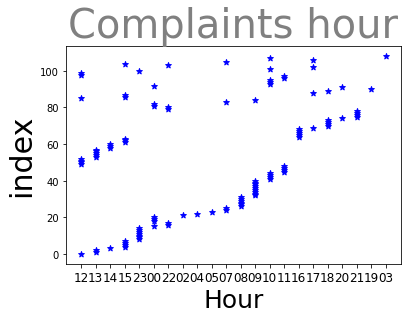

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data['Hour'], data.index.values,color="blue",marker = '*')

ax = plt.gca()
ax.tick_params(axis='x', colors='black',labelsize=12)
plt.title("Complaints hour",fontsize=40,color='grey')
plt.ylabel('index',fontsize=30)
plt.xlabel('Hour',fontsize=25)

plt.show()

### 10-calculate frequency of each hour

In [36]:
from collections import Counter

cd = Counter(data['Hour'])
con = cd.most_common()
  
print(con,'\n')

maximum =0 
for tupl in con: 
    for i in tupl:
        if type(i)==int and maximum<=i:
            maximum=i 
            hour=i-1
            
print('le nombre maximum des réclamations réçues à:',hour,'h')        

[('15', 10), ('09', 10), ('10', 9), ('12', 8), ('23', 8), ('13', 7), ('00', 7), ('08', 6), ('11', 6), ('22', 5), ('16', 5), ('18', 5), ('14', 4), ('07', 4), ('17', 4), ('21', 4), ('20', 2), ('02', 1), ('04', 1), ('05', 1), ('19', 1), ('03', 1)] 

le nombre maximum des réclamations réçues à: 9 h


### 11-Date plot 

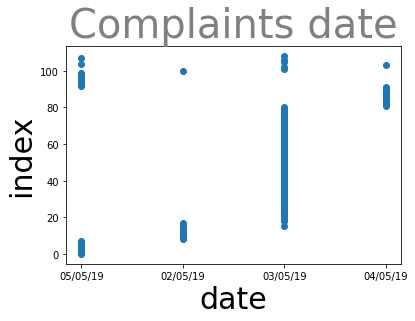

In [37]:
import matplotlib.pyplot as plt

date_list=data['date'].tolist()
plt.plot_date(date_list, data.index.values,)

plt.title("Complaints date",fontsize=40,color='grey')
plt.ylabel('index',fontsize=30)
plt.xlabel('date',fontsize=30)

plt.show()

### 12-Function to calculate words' percent 

In [38]:
def calculate_percent(df):
    total_count=words_df['Count'].sum()
    words_count=df.Count.sum()
    words_percent=round((words_count/total_count)*100,2)
    return words_percent

### 13-Search channel words from DataFrame  'words_df'

In [39]:
percent_channel_list=[]
#channel: agence
print("searched channel: agence ")
agence=words_df['Word'].str.contains('agence|banque|bank')
print(words_df[agence])
agence_percent=calculate_percent(words_df[agence])
print(" channel percent:",agence_percent,"% \n")
percent_channel_list.append(agence_percent)
print('-'*50)

#channel: application
print("searched channel: application ")
application=words_df['Word'].str.contains('application')
print(words_df[application])
application_percent=calculate_percent(words_df[application])
print(" channel percent:",application_percent,"% \n")
percent_channel_list.append(application_percent)
print('-'*50)

#channel: gab
print("searched channel: gab ")
gab=words_df['Word'].str.contains('gab|distributeur|dab|system|système')
print(words_df[gab])
gab_percent=calculate_percent(words_df[gab])
print(" channel percent:",gab_percent,"% \n")
percent_channel_list.append(gab_percent)
print('-'*50)

#channel:service bancaire mobile
print("searched channel: service bancaire mobile ")
mobile=words_df['Word'].str.contains('mobile|phone')
print(words_df[mobile])
mobile_percent=calculate_percent(words_df[mobile])
print(" channel percent:",mobile_percent,"% \n")
percent_channel_list.append(mobile_percent)
print('-'*50)

#channel: service bancaire par agent
print("searched channel: service bancaire par agent ")
agent=words_df['Word'].str.contains('agent|consultant')
print(words_df[agent])
agent_percent=calculate_percent(words_df[agent])
print(" channel percent:",agent_percent,"% \n")
percent_channel_list.append(agent_percent)
print('-'*50)

#channel: service bancaire via internet
print("searched channel: service bancaire via internet ")
internet=words_df['Word'].str.contains('internet|site|ligne|distance')
print(words_df[internet])
internet_percent=calculate_percent(words_df[internet])
print(" channel percent:",internet_percent,"% \n")
percent_channel_list.append(internet_percent)
print('-'*50)



total_channel_percent=round(sum([i for i in percent_channel_list]),2)
print("Total percent of channels:",total_channel_percent,"%")

percent_channel_list

searched channel: agence 
        Word  Count
127    banke      1
191    bankj      1
257  lagence      3
295   banque      4
415  dagence      1
571  banques      1
634   agence      4
 channel percent: 0.98 % 

--------------------------------------------------
searched channel: application 
             Word  Count
57    application      1
113  lapplication     15
 channel percent: 1.04 % 

--------------------------------------------------
searched channel: gab 
             Word  Count
46            dab      6
189           gab      2
207        system      1
302       système      1
479  distributeur      3
686         gabsi      1
 channel percent: 0.91 % 

--------------------------------------------------
searched channel: service bancaire mobile 
           Word  Count
79       mobile      8
227  smartphone      1
441   téléphone      2
 channel percent: 0.72 % 

--------------------------------------------------
searched channel: service bancaire par agent 
           Word  

[0.98, 1.04, 0.91, 0.72, 0.13, 0.39]

### 14-Bar plot of Different type of channels

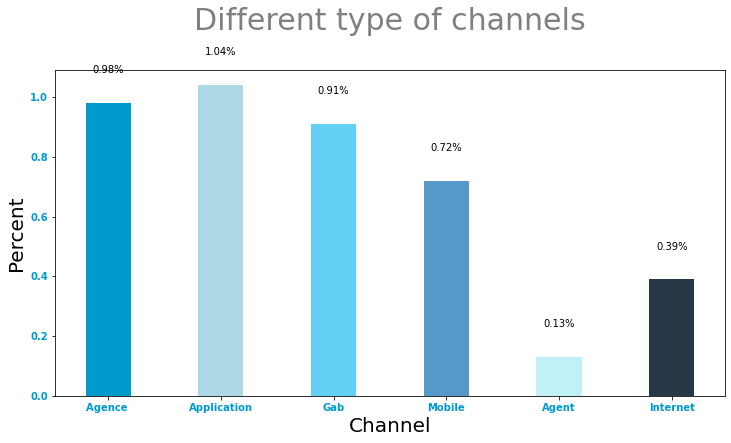

In [40]:
from matplotlib import pyplot as plt

x = ['Agence ', 'Application', 'Gab', 'Mobile','Agent','Internet']
y =percent_channel_list


fig, ax = plt.subplots(figsize = (12,6))
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#5499C7',   
                      '#C1F0F6', '#273746']

pps = ax.bar(x, y, width = 0.4, align='center',color = color_palette_list)

for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,s="{}%".format(height),ha='center')
    
plt.title("Different type of channels\n",fontsize=30,color="grey")
plt.xlabel('Channel',fontsize=20)
plt.ylabel('Percent',fontsize=20)
plt.xticks(color='#009ACD',fontweight='bold')
plt.yticks(color='#009ACD',fontweight='bold')

plt.show()

### 15-Search product words from DataFrame  'words_df'

In [41]:
percent_product_list=[]

#product:Carte bancaire
print("searched product: Carte bancaire ")
carte=words_df['Word'].str.contains('carte|plafond|frais|plafonné|visa|code')
print(words_df[carte])
carte_percent=calculate_percent(words_df[carte])
print(" product percent:",carte_percent,"% \n")
percent_product_list.append(carte_percent)
print('-'*50)

#product:Compte bancaire
print("searched product: Compte bancaire ")
Compte=words_df['Word'].str.contains('compte|tetulaire|courant|création')
print(words_df[Compte])
Compte_percent=calculate_percent(words_df[Compte])
print(" product percent:",Compte_percent,"% \n")
percent_product_list.append(Compte_percent)
print('-'*50)

#product: Chèque bancaire
print("searched product: Chèque bancaire ")
cheque=words_df['Word'].str.contains('chèque|carnet|cheque|chéquier')
print(words_df[cheque])
cheque_percent=calculate_percent(words_df[cheque])
print(" product percent:",cheque_percent,"% \n")
percent_product_list.append(cheque_percent)
print('-'*50)

#product: crédit bancaire
print("searched product: crédit bancaire ")
credit=words_df['Word'].str.contains('crédit|credit|mensuelle|immobilier|emprunt|prêt|avance|syndicat|rachat')
print(words_df[credit])
credit_percent=calculate_percent(words_df[credit])
print(" product percent:",credit_percent,"% \n")
percent_product_list.append(credit_percent)
print('-'*50)

#product: epargne
print("searched product: epargne ")
epargne=words_df['Word'].str.contains('epargne')
print(words_df[epargne])
epargne_percent=calculate_percent(words_df[epargne])
print(" product percent:",epargne_percent,"% \n")
percent_product_list.append(epargne_percent)
print('-'*50)

#product: espece
print("searched product: espece ")
espece=words_df['Word'].str.contains('flous|money|argent|salaire|chahria|capital|montant')
print(words_df[espece])
espece_percent=calculate_percent(words_df[espece])
print(" product percent:",espece_percent,"% \n")
percent_product_list.append(espece_percent)
print('-'*50)



total_product_percent=round(sum([i for i in percent_product_list]),2)
print("Total percent of products:",total_product_percent,"%")

percent_product_list

searched product: Carte bancaire 
          Word  Count
2        carte     32
10     plafond      6
26   plafonnée      1
246       visa      2
251      frais      3
616       code      1
 product percent: 2.93 % 

--------------------------------------------------
searched product: Compte bancaire 
               Word  Count
8            compte     35
204         courant      5
242        création      2
532  comptedebiteur      1
675       tetulaire      1
694         comptes      1
 product percent: 2.93 % 

--------------------------------------------------
searched product: Chèque bancaire 
         Word  Count
341    carnet      2
342   chèques      1
396  chéquier      2
678    cheque      1
 product percent: 0.39 % 

--------------------------------------------------
searched product: crédit bancaire 
           Word  Count
71      davance      5
287      rachat      1
288      crédit      8
298        prêt      3
327      credit      3
393   syndicats      1
420  immobilier   

[2.93, 2.93, 0.39, 1.56, 0.13, 1.63]

### 16-Bar plot of Different type of product

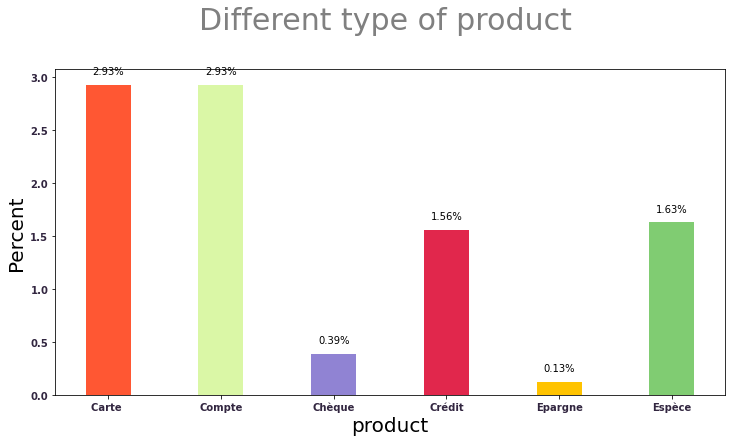

In [42]:
from matplotlib import pyplot as plt

x = ['Carte ', 'Compte', 'Chèque', 'Crédit','Epargne','Espèce']
y =percent_product_list


fig, ax = plt.subplots(figsize = (12,6))
color_palette_list = ['#FF5733', '#DAF7A6', '#9083D3', '#E1274C',   
                      '#FFC300', '#80CC72']

pps = ax.bar(x, y, width= 0.4, align='center',color = color_palette_list)

for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,s="{}%".format(height),ha='center')
    
plt.title("Different type of product \n",fontsize=30,color="grey")
plt.xlabel('product',fontsize=20)
plt.ylabel('Percent',fontsize=20)
plt.xticks(color='#322640',fontweight='bold')
plt.yticks(color='#322640',fontweight='bold')

plt.show()

### 17-Search operation words from DataFrame  'words_df'

In [43]:
percent_operation_list=[]

#operation:paiement
print("searched operation: paiement ")
paiement=words_df['Word'].str.contains('paiement|payer|facturer|rembourcement|commission|agio|tpe|appareil|terminal')
print(words_df[paiement])
paiement_percent=calculate_percent(words_df[paiement])
print(" operation percent:",paiement_percent,"% \n")
percent_operation_list.append(paiement_percent)
print('-'*50)

#operation:virement
print("searched operation: virement ")
virement=words_df['Word'].str.contains('virement|transfert|opération|effectué|effectuer')
print(words_df[virement])
virement_percent=calculate_percent(words_df[virement])
print(" operation percent:",virement_percent,"% \n")
percent_operation_list.append(virement_percent)
print('-'*50)

#operation:demande
print("searched operation: demande ")
demande=words_df['Word'].str.contains('demande|renseigner|besoin|charger|régler|configuré|deblocage|réinstallation|réactivation|réactive|désactivé|désabonner|récupérer|desactiver|beneficier|bénéficiaires|ajout|annuler|annulé|enrigistrer|recharger')
print(words_df[demande])
demande_percent=calculate_percent(words_df[demande])
print(" operation percent:",demande_percent,"% \n")
percent_operation_list.append(demande_percent)
print('-'*50)

#operation:transaction
print("searched operation: transaction ")
transaction=words_df['Word'].str.contains('transaction|action|traitement')
print(words_df[transaction])
transaction_percent=calculate_percent(words_df[transaction])
print(" operation percent:",transaction_percent,"% \n")
percent_operation_list.append(transaction_percent)
print('-'*50)

#operation:retrait
print("searched operation: retrait ")
retrait=words_df['Word'].str.contains('retirer|retire|nejbed|retrait|retirais|retiré|prélevé')
print(words_df[retrait])
retrait_percent=calculate_percent(words_df[retrait])
print(" operation percent:",retrait_percent,"% \n")
percent_operation_list.append(retrait_percent)
print('-'*50)

#operation:Consultation
print("searched operation: Consultation ")
Consultation=words_df['Word'].str.contains('solde|identité|num|numéro|consulté|consultant|montant|sélectionner|savoir|accéder|accès|affiche|renseigner|historique|saisie|fiche')
print(words_df[Consultation])
Consultation_percent=calculate_percent(words_df[Consultation])
print(" operation percent:",Consultation_percent,"% \n")
percent_operation_list.append(Consultation_percent)
print('-'*50)



total_operation_percent=round(sum([i for i in percent_operation_list]),2)
print("Total percent of operation:",total_operation_percent,"%")

percent_operation_list

searched operation: paiement 
              Word  Count
32        paiement      3
35             tpe      2
64        terminal      9
209      lappareil      1
301       appareil      5
333     commission      2
338       facturer      1
350           agio      2
426          payer      1
501  rembourcement      1
556      terminale      1
 operation percent: 1.82 % 

--------------------------------------------------
searched operation: virement 
           Word  Count
23    effectuer      5
31     effectué      6
53   deffectuer      3
54     virement     21
118   virements      6
145  lopération      2
188   opération      2
283   transfert      2
 operation percent: 3.06 % 

--------------------------------------------------
searched operation: demande 
               Word  Count
69       renseigner      2
84          demande      5
91       désabonner      1
96       desactiver      1
97       beneficier      1
146         charger      1
208    denrigistrer      1
230    réactivat

[1.82, 3.06, 2.15, 0.91, 1.3, 2.93]

### 18-Bar plot of Different type of operation


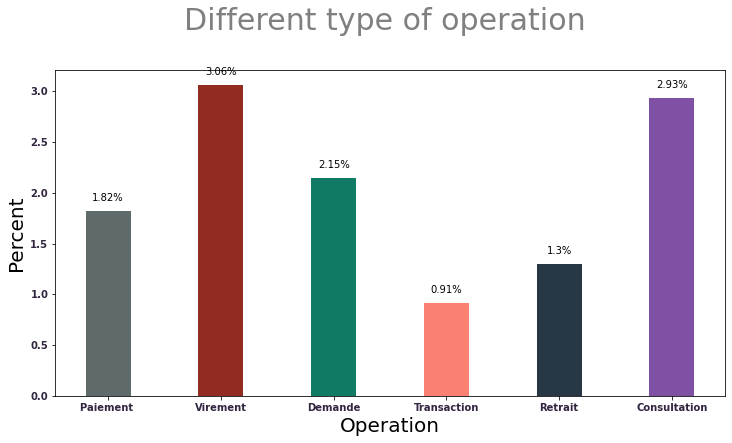

In [44]:
from matplotlib import pyplot as plt

x = ['Paiement ', 'Virement', 'Demande', 'Transaction','Retrait','Consultation']
y =percent_operation_list


fig, ax = plt.subplots(figsize = (12,6))
color_palette_list = ['#5F6A6A', '#922B21', '#117A65', '#FA8072',   
                      '#273746','#7F51A5']

pps = ax.bar(x, y, width = 0.4, align='center',color = color_palette_list)

for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,s="{}%".format(height),ha='center')
    
plt.title("Different type of operation \n",fontsize=30,color="grey")
plt.xlabel('Operation',fontsize=20)
plt.ylabel('Percent',fontsize=20)
plt.xticks(color='#322640',fontweight='bold')
plt.yticks(color='#322640',fontweight='bold')

plt.show()

### 19-Search problems words from DataFrame  'words_df'

In [45]:
#problems
print("searched problem:")
problem=words_df['Word'].str.contains('probléme|essayer|trouver|expliquer|solution|correctement|corrige|attente|erreur|erroné|retard|réclamation|raison|maltraitance|bloqué|absorbe|perdu|message|remarque|réponse|répondre|régulariser|rapide|vite|service|délai|traitement|essai|situation|validité|catastrophique|obligation|étape|réclamation|mise|fonctionne|fonctionné|contacter|refusé|limite|dépassé')
print(words_df[problem])
problem_percent=calculate_percent(words_df[problem])
print(" Problem percent:",problem_percent,"% \n")

searched problem:
               Word  Count
18         corriger      1
27      réclamation      8
29        contacter      1
39           refusé      1
48          message     11
49          dépassé      1
50           limite      1
58           erreur     13
87            perdu      1
88          réponse      7
92          service      7
93         messagek      1
109         trouver      3
110      obligation      1
121            mise      5
149      fonctionne      6
154        remarque      1
159          erroné      1
160         corrige      1
164        solution      1
176       remarques      1
240          dessai      1
261          raison      3
275        validité      2
279          bloqué      3
291         attente      1
303         essayer      1
316    correctement      1
339       expliquer      1
357      fonctionné      1
367          étapes      1
372  fonctionnement      1
418          retard      1
433          rapide      1
440  catastrophique      1
442       

### 20- Pie Chart of Percent of Words

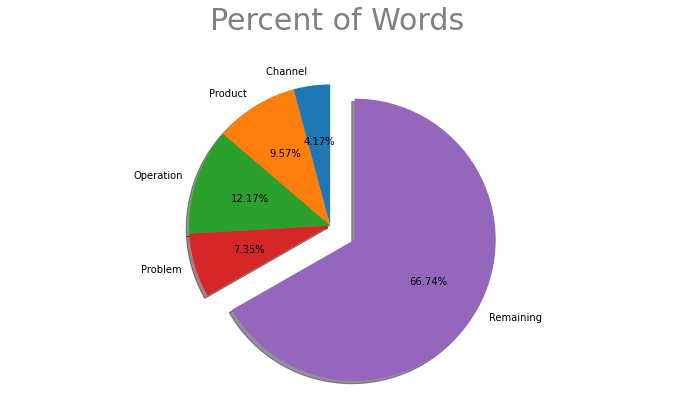

In [46]:
import matplotlib.pyplot as plt

labels = 'Channel ', 'Product', 'Operation', 'Problem', 'Remaining'
sizes = [total_channel_percent, total_product_percent, total_operation_percent,problem_percent, 100-(total_channel_percent+total_product_percent+total_operation_percent+problem_percent)]

explode = ( 0,0,0,0,0.2)
fig, ax = plt.subplots(figsize = (12,6))
plt.pie(sizes,explode=explode, labels=labels,autopct='%1.2f%%',shadow=True, startangle=90)

ax.set_title('Percent of Words \n',fontsize=30,color="grey")
plt.axis('equal')
plt.show()